In [96]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
user = pd.read_csv('user_table.csv')
test = pd.read_csv('test_table.csv', parse_dates =['date'])

In [101]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [102]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [103]:
 len(user['user_id'])   == len(test['user_id'])

False

In [104]:
data = test.merge(user, on = 'user_id', how = 'outer')
data.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [105]:
np.sum(data.isnull())

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [106]:
data['is_ads_channel'] = 0
data.loc[data['ads_channel'].isnull()== True ,'is_ads_channel'] =1

In [107]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,is_ads_channel
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain,1
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico,0
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico,0
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico,0


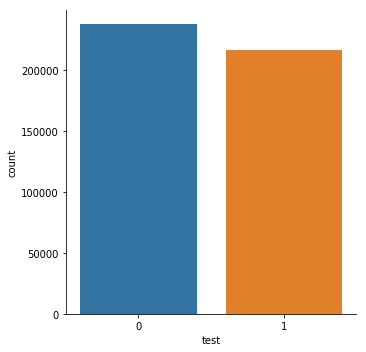

In [108]:
_ = sns.catplot( 'test',data= data, kind = 'count')

For test and control data, they have similar numbers.

In [109]:
data.groupby('country')['conversion'].agg(['mean']).sort_values(by= 'mean',ascending = False)

,mean
country,
Spain,0.079719
Costa Rica,0.053494
Nicaragua,0.053399
Colombia,0.051332
El Salvador,0.050765
Mexico,0.050341
Peru,0.050258
Chile,0.049704
Venezuela,0.049666


In [110]:
s =stats.ttest_ind(data.loc[data['test'] == 1, 'conversion'], data.loc[data['test'] == 0, 'conversion'])
print(s[1])


4.1743494389297265e-74


# We can reject the hypothesis that they have the same mean
The reasons could be:
1. We didn't collect enough data
2. Some bias has been introduced in the test, so test/control people are not random

In [115]:
# test conversion ratio
ratio = data[data['test'] == 1].groupby('date')['conversion'].mean()/data[data['test'] == 0].groupby('date')['conversion'].mean()

Text(0,0.5,'Test Conversion/ Control Conversion')

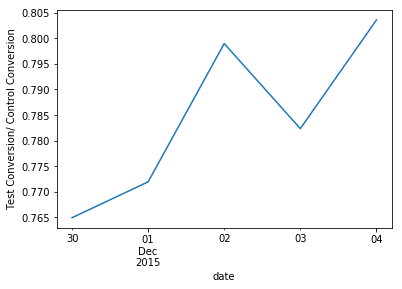

In [116]:
ax = ratio.plot(figsize= (6,4))
ax.set_xlabel('date')
ax.set_ylabel('Test Conversion/ Control Conversion')

We can see an increase in the test converison ratio for the test sample which runs only 5 days.
In order to take take unbiased data, we have to take long time data, probably 1 week or 2. 
# For the a/b test to be valid, both the control and test sample have to be the same except for the one feature.
## If they are not then the effect of another feature could of caused the change in conversion.
### In here we will use three tools:
1. plot the distributions of the each feature for test and control
2. use a decision tree to see if any feature can predict whether a data point is in a test or control
3. use a t-test tp verify results

In [121]:
# examine the relation to conversion for each feature on test/control:
#for i in :
print(data.columns.difference(['user_id','test']))

Index(['ads_channel', 'age', 'browser', 'browser_language', 'conversion',
       'country', 'date', 'device', 'is_ads_channel', 'sex', 'source'],
      dtype='object')
